<a href="https://colab.research.google.com/github/TamerHamed/DS-Assignment-Submission-Practice-Repository/blob/master/Tamer_Hamed_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [8]:
##### Begin Working Here #####
# Import Panda and numpy
import pandas as pd
import numpy as np

In [9]:
# Call online grocery_online Dataset:
groc_ds = pd.read_csv('orders.csv')

# show first 5 rows
groc_ds.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
# Show last 5 rows
groc_ds.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [55]:
# let we have a look on the data set  Print ("")
print("The Data Type of Grocry Orders Dataset:")
print (groc_ds.dtypes)
print("=====================")
print("The Data Shape of Grocry Orders Dataset:")
print (groc_ds.shape)
print("=====================")
print("Describing data:")
groc_ds.describe()

The Data Type of Grocry Orders Dataset:
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
The Data Shape of Grocry Orders Dataset:
(3421083, 7)
Describing data:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [56]:
#check if there is any mising data
groc_ds.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [57]:
# set a variable for `order_hour_of_day` and 'days_since_prior_order' column.
hourvasday = groc_ds[['order_hour_of_day', 'days_since_prior_order']].head(10)
print (hourvasday)

   order_hour_of_day  days_since_prior_order
0                  8                     NaN
1                  7                    15.0
2                 12                    21.0
3                  7                    29.0
4                 15                    28.0
5                  7                    19.0
6                  9                    20.0
7                 14                    14.0
8                 16                     0.0
9                  8                    30.0


In [58]:
# look at the first 50 row of 'order_hour_of_day cloum' 
groc_ds.order_hour_of_day.head(50)

0      8
1      7
2     12
3      7
4     15
5      7
6      9
7     14
8     16
9      8
10     8
11    11
12    10
13    10
14    10
15    11
16     9
17    12
18    15
19     9
20    11
21    10
22     9
23    11
24    10
25    11
26    14
27    19
28    16
29    18
30    17
31    16
32    15
33    17
34    16
35    16
36    18
37    15
38    15
39    11
40    11
41    15
42    13
43    13
44    12
45    12
46    16
47    18
48    18
49    11
Name: order_hour_of_day, dtype: int64

In [77]:
# it is look like we have 206209 Nan data all in 'days_since_prior_order'
# let we check the percentage of this Nan data to all data in the coulomn

Nandata = groc_ds['days_since_prior_order'].isnull().sum()
index = groc_ds.index
number_of_rows = len(index)
NANpercent = (Nandata / number_of_rows)*100
print("Missing data percent:")
print (NANpercent, "%")


Missing data percent:
6.027594185817766 %


In [86]:
# drop missing data (we will miss you :))
groc_ds['days_since_prior_order'].dropna(inplace=True)

# you still there ??
groc_ds['days_since_prior_order'].isnull().sum()

0

In [87]:
# I can make a smaller dataframe with a few specific column headers
# by passing a list of column headers inside of the square brackets
myfavor_groc = groc_ds[['order_dow', 'order_hour_of_day' , 'days_since_prior_order']].copy()
print (myfavor_groc.head(10))

   order_dow  order_hour_of_day  days_since_prior_order
0          2                  8                     NaN
1          3                  7                    15.0
2          3                 12                    21.0
3          4                  7                    29.0
4          4                 15                    28.0
5          2                  7                    19.0
6          1                  9                    20.0
7          1                 14                    14.0
8          1                 16                     0.0
9          4                  8                    30.0


In [88]:
# calculat that is 'Orders fequancy'
# mutubly the price by the square footage
myfavor_groc['Orders_fequancy']= myfavor_groc['order_hour_of_day'] * myfavor_groc['order_dow']
myfavor_groc.head()

,order_dow,order_hour_of_day,days_since_prior_order,Orders_fequancy
0,2,8,NaN,16
1,3,7,15.0,21
2,3,12,21.0,36
3,4,7,29.0,28
4,4,15,28.0,60


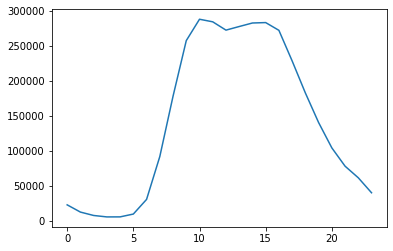

In [102]:
# look at the ditribution shape of order_hour_of_day
myfavor_groc['order_hour_of_day'].value_counts().sort_index().plot();

order_dow               0         1         2  ...         4         5         6
Orders_fequancy                                ...                              
0                0.969629  0.005928  0.004936  ...  0.004263  0.005146  0.005335
1                0.000000  1.000000  0.000000  ...  0.000000  0.000000  0.000000
2                0.000000  0.412775  0.587225  ...  0.000000  0.000000  0.000000
3                0.000000  0.333482  0.000000  ...  0.000000  0.000000  0.000000
4                0.000000  0.247855  0.288909  ...  0.463235  0.000000  0.000000
...                   ...       ...       ...  ...       ...       ...       ...
120              0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.000000
126              0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.000000
132              0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.000000
138              0.000000  0.000000  0.000000  ...  0.000000  0.000000  1.000000
All              0.175648  0

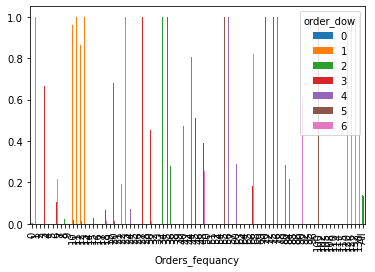

In [113]:
# look at crosstab 'Orders_fequancy' and 'order_dow' and margins
toplot=pd.crosstab(myfavor_groc['Orders_fequancy'], myfavor_groc['order_dow'] , margins=True, normalize='index')
print (toplot)
toplot.plot(kind='bar');

In [131]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-07-11 01:48:44--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 35.166.36.92, 54.148.162.195, 52.42.46.127, ...
Connecting to resources.lendingclub.com (resources.lendingclub.com)|35.166.36.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [       <=>          ]  22.21M  1.74MB/s    in 13s     

2020-07-11 01:48:58 (1.75 MB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [23289953]



In [133]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [156]:
loan_df = pd.read_csv('LoanStats_2018Q4.csv')
print("The new Data set Shape:")
print(loan_df.shape)
print("=====================")
print("The first 5 rows look like that:")
loan_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The new Data set Shape:
(128415, 1)
The first 5 rows look like that:


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title            emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt     total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       18000     18000       18000            36 months   8.81%  570.81      A     A5        Sever                < 1 year   RENT           40000      Source Verified     Dec-2018 Charged Off n          NaN NaN  debt_consolidation Debt consolidation      100xx    NY         12.81 0           Apr-2014         0              NaN                    NaN                    15       0       16147     35.2%      21        w                   0.00      0.00          6265.69         6265.69         5136.86         1128.83       0.0                0.0        0.0                     Oct-2019     570.81          NaN          May-2020           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            28062       1           4           1           4           7                  11915        79      3           6           6591       46       45900            0      0           1            10                   1871        22177          38.1    0                        0           23                 56                   4                     4              0        4                    NaN                      8                     NaN                            0                     5              6               8           10        4         11            15            6                   15       0                0            0                  4                  100            12.5     

In [157]:
#remove un-necessry Row 
loan_df = pd.read_csv('LoanStats_2018Q4.csv' , skiprows=1, skipfooter=2)
loan_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,...,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,NaN,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,...,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,NaN,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,...,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,Apr-2020,2.0,0.0,ACTIVE,627.45,26278.58,752.41,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,...,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,...,66.7,0,0,137276,87876,58600,74676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,May-2020,4.0,0.0,ACTIVE,1086.68,9481.75,55.80,N,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
#check if there is any mising data
pd.set_option('display.max_row' , 144)


In [161]:
loan_df.isnull().sum()

id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [164]:
#let we clean this data from Nan some
loan_df = loan_df.drop(['mths_since_last_record', 'settlement_percentage', 'settlement_amount', 'settlement_date',
                         'settlement_status', 'debt_settlement_flag_date', 'hardship_last_payment_amount',
                         'hardship_payoff_balance_amount', 'orig_projected_additional_accrued_interest', 'hardship_loan_status',
                         'hardship_dpd', 'hardship_length', 'payment_plan_start_date'], axis=1).copy()

In [165]:
loan_df.shape

(128412, 131)

In [167]:
# Look at the first 10 values of the int_rate column
loan_df['int_rate'].head(10)

0      8.81%
1     12.98%
2     14.47%
3     17.97%
4     23.40%
5     26.31%
6     19.92%
7     23.40%
8     23.40%
9     11.80%
Name: int_rate, dtype: object

In [173]:
# remove leading space and percent from int_rate to convert it ot Intg
def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [182]:
new_list = []
for cell in loan_df['int_rate']:
   new_list.append(myfunc(cell))
 

In [187]:
  new_list[:12]

[8.81, 12.98, 14.47, 17.97, 23.4, 26.31, 19.92, 23.4, 23.4, 11.8, 14.47, 17.97]

In [188]:
#insert new column for new cean data
loan_df['int_rate_cleaned'] = pd.Series(new_list)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,debt_settlement_flag,settlement_term,int_rate_cleaned
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,...,10,4,11,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,8.81
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,...,6,28,5,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,12.98
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,...,11,15,13,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,N,NaN,14.47
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,...,3,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,17.97
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,4031.26,...,7,11,7,9,7,14,0.0,0,0,1,100.0,66.7,0,0,137276,87876,58600,74676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,N,NaN,23.40


In [190]:
# improve all with the .apply function!
loan_df['int_rate_cleaned2'] = loan_df['int_rate'].apply(myfunc)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,debt_settlement_flag,settlement_term,int_rate_cleaned,int_rate_cleaned2
0,NaN,NaN,18000,18000,18000.0,36 months,8.81%,570.81,A,A5,Sever,< 1 year,RENT,40000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,100xx,NY,12.81,0,Apr-2014,0,NaN,15,0,16147,35.2%,21,w,0.00,0.00,6265.690000,6265.69,5136.86,...,4,11,15,6,15,0.0,0,0,4,100.0,12.5,0,0,60900,28062,35800,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,8.81,8.81
1,NaN,NaN,18500,18500,18500.0,60 months,12.98%,420.75,B,B5,Supply Chain Analyst,5 years,RENT,96500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,554xx,MN,27.86,1,May-2009,0,7.0,19,0,19000,62.1%,38,w,14135.68,14135.68,7553.490000,7553.49,4364.32,...,28,5,10,5,19,0.0,0,0,0,97.3,66.7,0,0,131337,81660,22900,100737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,12.98,12.98
2,NaN,NaN,32000,32000,32000.0,60 months,14.47%,752.41,C,C2,Teacher,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,152xx,PA,26.11,0,Oct-2000,0,24.0,18,0,14833,43%,32,w,26017.15,26017.15,11247.560000,11247.56,5982.85,...,15,13,16,11,18,0.0,0,0,3,77.4,12.5,0,0,94609,73873,26800,60109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,CVD19SKIP,INCOMECURT,COMPLETE,2.0,0.0,Apr-2020,Jun-2020,N,NaN,14.47,14.47
3,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0,Apr-2011,0,NaN,8,0,4599,19.1%,13,w,0.00,0.00,5637.052785,5637.05,5000.00,...,4,6,7,3,8,0.0,0,0,0,100.0,0.0,0,0,136927,11749,13800,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,17.97,17.97
4,NaN,NaN,13000,13000,13000.0,36 months,23.40%,505.95,E,E1,Sale Representative,2 years,MORTGAGE,90000.0,Verified,Dec-2018,Current,n,NaN,NaN,other,Other,191xx,PA,39.73,0,May-2007,0,NaN,14,0,52013,83.1%,20,w,8968.74,8968.74,7057.950000,7057.95,4031.26,...,11,7,9,7,14,0.0,0,0,1,100.0,66.7,0,0,137276,87876,58600,74676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,CVD19SKIP,INCOME_CURTAILMENT,ACTIVE,4.0,0.0,May-2020,Jul-2020,N,NaN,23.40,23.40


In [192]:
# whos most 5 catagory have a loane
loan_df['emp_title'].value_counts(dropna=False)[:10]

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
RN                    726
Supervisor            697
Sales                 580
Project Manager       526
General Manager       523
Name: emp_title, dtype: int64

In [194]:
#How many different unique employment titles are there currently?
len(loan_df['emp_title'].unique())

43893

In [201]:
# Write a function to clean up these use cases and increase uniformity.

mylist=[]
for col in loan_df.columns:
  if col.endswith('_d'):
    mylist.append(col)



In [203]:
    mycols = [col for col in loan_df.columns if col.endswith('_d')]
    mycols

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [205]:
loan_df['issue_d'][:15]

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
11    Dec-2018
12    Dec-2018
13    Dec-2018
14    Dec-2018
Name: issue_d, dtype: object

In [207]:
# infer_datetime_format=True
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], infer_datetime_format=True)
loan_df[mycols].head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2018-12-01,Oct-2019,NaN,May-2020
1,2018-12-01,Jun-2020,Jul-2020,Jun-2020
2,2018-12-01,May-2020,Jul-2020,Jun-2020
3,2018-12-01,Oct-2019,NaN,Jun-2020
4,2018-12-01,Jun-2020,Aug-2020,Jun-2020


In [208]:
loan_df['issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [209]:
loan_df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [210]:
loan_df=loan_df[mycols].copy()
loan_df['year']=loan_df['issue_d'].dt.year
loan_df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year
0,2018-12-01,Oct-2019,NaN,May-2020,2018
1,2018-12-01,Jun-2020,Jul-2020,Jun-2020,2018
2,2018-12-01,May-2020,Jul-2020,Jun-2020,2018
3,2018-12-01,Oct-2019,NaN,Jun-2020,2018
4,2018-12-01,Jun-2020,Aug-2020,Jun-2020,2018


In [211]:
loan_df['month']=loan_df['issue_d'].dt.month
loan_df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month
0,2018-12-01,Oct-2019,NaN,May-2020,2018,12
1,2018-12-01,Jun-2020,Jul-2020,Jun-2020,2018,12
2,2018-12-01,May-2020,Jul-2020,Jun-2020,2018,12
3,2018-12-01,Oct-2019,NaN,Jun-2020,2018,12
4,2018-12-01,Jun-2020,Aug-2020,Jun-2020,2018,12


In [213]:
loan_df['last_credit_pull_d']=pd.to_datetime(loan_df['last_credit_pull_d'], infer_datetime_format=True)
loan_df.head()

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,year,month
0,2018-12-01,Oct-2019,NaN,2020-05-01,2018,12
1,2018-12-01,Jun-2020,Jul-2020,2020-06-01,2018,12
2,2018-12-01,May-2020,Jul-2020,2020-06-01,2018,12
3,2018-12-01,Oct-2019,NaN,2020-06-01,2018,12
4,2018-12-01,Jun-2020,Aug-2020,2020-06-01,2018,12


In [223]:
 #let we calculat the ammount of loane per day 
 
DefDay= loan_df['last_credit_pull_d'] - loan_df['issue_d']
DefDay

0        517 days
1        548 days
2        548 days
3        548 days
4        548 days
           ...   
128407    31 days
128408   609 days
128409   609 days
128410   609 days
128411   609 days
Length: 128412, dtype: timedelta64[ns]

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [5]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-07-10 22:52:37--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.47.182
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.47.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  81.7MB/s    in 2.4s    

2020-07-10 22:52:40 (81.7 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [6]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [7]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01
